# Stock Trading

The cell below defines the **abstract class** whose API you need to implement. **Do NOT modify it** - use the dedicated cell further below for your implementation instead.

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  
      

# abstract class to represent a stock trading platform
class AbstractStockTradingPlatform(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # adds transactionRecord to the set of completed transactions
    @abstractmethod
    def logTransaction(self, transactionRecord):
        pass

    # returns a list with all transactions of a given stockName,
    # sorted by increasing trade value. 
    # stockName : str
    @abstractmethod
    def sortedTransactions(self, stockName): 
        sortedList = []
        return sortedList    
    
    # returns a list of transactions of a given stockName with minimum trade value
    # stockName : str
    @abstractmethod
    def minTransactions(self, stockName): 
        minList = []
        return minList    
    
    # returns a list of transactions of a given stockName with maximum trade value
    # stockName : str
    @abstractmethod
    def maxTransactions(self, stockName): 
        maxList = []
        return maxList    

    # returns a list of transactions of a given stockName, 
    # with the largest trade value below a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def floorTransactions(self, stockName, thresholdValue): 
        floorList = []
        return floorList    

    # returns a list of transactions of a given stockName, 
    # with the smallest trade value above a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def ceilingTransactions(self, stockName, thresholdValue): 
        ceilingList = []
        return ceilingList    

        
    # returns a list of transactions of a given stockName,  
    # whose trade value is within the range [fromValue, toValue].
    # stockName : str
    # fromValue : double
    # toValue : double
    @abstractmethod
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        return rangeList    

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [5]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class TransactionRecord:
    def __init__(self, price: float, quantity: int, time: str) -> None:
        self.price = price
        self.quantity = quantity
        self.time = time

    def tradeValue(self) -> float:
        """
        Returns the value of the trade
        """
        return self.price * self.quantity


class AVLNode:
    def __init__(self,  initialPair = None):
        if initialPair is None:
            self._key = None
            self._values = []
            self._left = None
            self._right = None
        else:
            self._key = initialPair[0]
            self._values = [initialPair[1]]
            self._left = AVLNode(None)
            self._right = AVLNode(None)


    def __repr__(self) -> str:
        def _internal_repr(node: AVLNode, indent: int) -> str:
            if node.isLeaf():
                return "None"

            spaces = " " * indent
            string = "\n"
            l_repr = _internal_repr(node._left, indent + 4)
            r_repr = _internal_repr(node._right, indent + 4)

            string += f"{spaces}{node._key} : {node._values}\n"
            string += f"{spaces}left: {l_repr}\n"
            string += f"{spaces}right: {r_repr}"

            return string

        return _internal_repr(self, 0)


    def balance(self, insertPath: [int]) -> None:
        """
        Recursively balances a tree
        """
        if len(insertPath) < 2:
            return

        *remainingInsertPath, childInsertDirection = insertPath
        grandchildInsertDirection = remainingInsertPath[-1]

        if childInsertDirection == -1:
            self._left.balance(remainingInsertPath)
        else:
            self._right.balance(remainingInsertPath)

        left_height  = self._left.height()
        right_height = self._right.height()

        # If unbalanced, rotate according to the path
        if abs(left_height - right_height) > 1:
            if childInsertDirection == -1:
                if grandchildInsertDirection == -1:
                    self.rightRotate()
                else:
                    self.leftRightRotate()
            else:
                if grandchildInsertDirection == -1:
                    self.rightLeftRotate()
                else:
                    self.leftRotate()



    def height(self) -> int:
        """
        Gets the height of a tree
        """
        if self.isLeaf():
            return 0
        else:
            return 1 + max(self._left.height(), self._right.height())


    def insert(self, key, value, comp) -> [int]:
        """
        Inserts a key/value pair into the tree

        returns a list containing the insertion path,
        adding amember as follows:
            if inserted into the left branch: -1
            if inserted into the right branch: 1
            otherwise, returns an empty list
        """
        path = []

        if self.isLeaf():
            self._key = key
            self._values = [value]
            self._left  = AVLNode(None)
            self._right = AVLNode(None)
        else:
            x = comp(key)
            y = comp(self._key)
            path = []

            if x < y:
                path = self._left.insert(key, value, comp)
                path.append(-1)
            elif x > y:
                path = self._right.insert(key, value, comp)
                path.append(1)
            else:
                self._values.append(value)

        return path


    def isLeaf(self) -> bool:
        """
        Leaves are internally represented as nodes whose value is None.
        This returns whether self._value is None
        """
        return self._key is None

    
    """
    Rotations
    """


    def leftRotate(self) -> None:
        """
        Performs a left rotation on self
        """
        if not self.isLeaf() and not self._right.isLeaf():
            newLeft = AVLNode((self._key, self._values[0]))
            newLeft._values = [v for v in self._values]
            newLeft._left   = self._left
            newLeft._right  = self._right._left

            self._key    = self._right._key
            self._values = [v for v in self._right._values]
            self._right  = self._right._right
            self._left   = newLeft


    def rightRotate(self) -> None:
        """
        Performs a right rotation on self
        """
        if not self.isLeaf() and not self._left.isLeaf():
            newRight = AVLNode((self._key, self._values[0]))
            newRight._values = [v for v in self._values]
            newRight._right  = self._right
            newRight._left   = self._left._right

            self._key    = self._left._key
            self._values = [v for v in self._left._values]
            self._left   = self._left._left
            self._right  = newRight


    def leftRightRotate(self) -> None:
        """
        Performs a left right rotation on self
        """
        if not self.isLeaf() and not self._left.isLeaf():
            self._left.leftRotate()
            self.rightRotate()


    def rightLeftRotate(self) -> None:
        """
        Performs a right left rotation on self
        """
        if not self.isLeaf() and not self._right.isLeaf():
            self._right.rightRotate()
            self.leftRotate()


    """
    Helpers for StockTradingPlatform
    """
        

    def ceilingValues(self, key) -> (float, list):
        """
        Gets all values whose key is the lowest above a supplied key

        Returns: (key, values)
        """

        if self.isLeaf():
            return (float("-inf"), [])

        if self._key == key:
            return (key, self._values)

        if self._key < key:
            return self._right.ceilingValues(key)

        ceilKey, ceilVals = self._left.ceilingValues(key)

        if ceilKey < key:
            return (key, self._values)
        else:
            return (ceilKey, ceilVals)


    def floorValues(self, key) -> (float, list):
        """
        Gets all values whose key is the highest below the supplied key

        Returns: (key, values)
        """

        if self.isLeaf():
            return (float("inf"), [])

        if self._key == key:
            return (key, self._values)

        if self._key > key:
            return self._left.floorValues(key)

        floorKey, floorVals = self._right.floorValues(key)

        if floorKey > key:
            return (key, self._values)
        else:
            return (floorKey, floorVals)

    
    def rangeValues(self, fromKey, toKey, vals) -> None:
        """
        Gets all values from nodes whose keys are in [fromKey, toKey]
        """

        if self.isLeaf():
            return

        if self._key < fromKey:
            self._right.rangeValues(fromKey, toKey, vals)
        elif fromKey == self._key < toKey:
            vals += self._values
            self._right.rangeValues(fromKey, toKey, vals)
        elif fromKey < self._key < toKey:
            self._left.rangeValues(fromKey, toKey, vals)
            vals += self._values
            self._right.rangeValues(fromKey, toKey, vals)
        elif fromKey < self._key == toKey:
            self._left.rangeValues(fromKey, toKey, vals)
            vals += self._values
        else:
            self._left.rangeValues(fromKey, toKey, vals)


class AVLTree:
    def __init__(self, comp = lambda x : x) -> None:
        self.rootNode = AVLNode(None)
        self.comp = comp


    def __repr__(self) -> str:
        return f"{self.rootNode}"


    def insert(self, key, value) -> None:
        """
        Adds a value to the tree 
        """
        path = self.rootNode.insert(key, value, self.comp)
        self.rootNode.balance(path)



    def makeSortedList(self) -> list:
        """
        Creates a list from the tree in ascending order
        """
        def rec_msl(node: AVLNode, collected: [AVLNode]) -> None:
            if not node.isLeaf():
                rec_msl(node._left, collected)
                collected.append(node)
                rec_msl(node._right, collected)

        nodes = []
        rec_msl(self.rootNode, nodes)

        return nodes


Use the cell below to implement the requested API. 

In [6]:
# IMPLEMENT HERE THE REQUESTED API

class StockTradingPlatform(AbstractStockTradingPlatform):
    
    def __init__(self):
        self.recordDict: { str : AVLTree } = {}
        

    def logTransaction(self, transactionRecord):
        """
        Adds a transaction to recordDict
        
        The stock name is used as the key in self.recordDict
        """
        name, *values = transactionRecord
        transaction = TransactionRecord(*values)

        if name not in self.recordDict:
            self.recordDict[name] = AVLTree()

        self.recordDict[name].insert(transaction.tradeValue(), transaction)


    def sortedTransactions(self, stockName):
        """
        Returns a list of all transactions in order of their trade value
        """
        if stockName in self.recordDict:
            nodeList = self.recordDict[stockName].makeSortedList()
            return [tr for node in nodeList for tr in node._values]
        else:
            print("stock name is not in dictionary")
            return []

    
    def minTransactions(self, stockName):
        """
        Returns all transactions with the lowest trade value
        """
        if (tree := self.recordDict.get(stockName)) is not None:
            nodeCursor = tree.rootNode

            while not nodeCursor._left.isLeaf():
                nodeCursor = nodeCursor._left

            return nodeCursor._values
        else:
            print("stock name is not in dictionary")
            return []

    
    def maxTransactions(self, stockName): 
        """
        Returns all transactions with the highest trade value
        """
        if (tree := self.recordDict.get(stockName)) is not None:
            nodeCursor = tree.rootNode

            while not nodeCursor._right.isLeaf():
                nodeCursor = nodeCursor._right

            return nodeCursor._values
        else:
            print("stock name is not in dictionary")
            return []


    def floorTransactions(self, stockName, thresholdValue): 
        """
        Returns the transactions of stockName with the largest trade
        value below thresholdValue
        """

        # All trade values will in pence so only 2 decimal places will be used.
        # Therefore too find the floor transaction < thresholdValue and not
        # == thresholdValue, we subtract half a penny.
        thresholdValue -= 0.005
    
        
        if (tree := self.recordDict.get(stockName)) is not None:
            return tree.rootNode.floorValues(thresholdValue)[1]
        else:
            return []


    def ceilingTransactions(self, stockName, thresholdValue): 
        """
        Returns the transactions of stockName with the lowest trade
        value above thresholdValue
        """

        # Same as flooatTransactions but we add half a penny
        thresholdValue += 0.005
        
        if (tree := self.recordDict.get(stockName)) is not None:
            return tree.rootNode.ceilingValues(thresholdValue)[1]
        else:
            return []

    
    def rangeTransactions(self, stockName, fromValue, toValue): 
        """
        Gets all transactions whose trade value is in [fromValue, toValue]
        """

        if (tree := self.recordDict.get(stockName)) is not None:
            rangeValues = []
            tree.rootNode.rangeValues(fromValue, toValue, rangeValues)

            return rangeValues
        else:
            return []

    def loadData(self, dataset):
        # helper function for logging the transactions from dataset
        for data in dataset:
            self.logTransaction(data)
        

The cell below provides helper code that you can use within your experimental framework to generate random transaction data. **Do NOT modify it**.

In [7]:
# DO NOT MODIFY THIS CELL

import random
from datetime import timedelta
from datetime import datetime

class TransactionDataGenerator:
    def __init__(self):
        self.stockNames = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group", 
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown", 
                      "London Stock Exchange Group", "Pershing Square Holdings", 
                      "Schroders", "St. James's Place plc."]
        self.minTradeValue = 500.00
        self.maxTradeValue = 100000.00
        self.startDate = datetime.strptime('1/1/2022 1:00:00', '%d/%m/%Y %H:%M:%S')
        random.seed(20221603)
          
    # returns the name of a traded stock at random
    def getStockName(self):
        return random.choice(self.stockNames)

    # returns the trade value of a transaction at random
    def getTradeValue(self):
        return round(random.uniform(self.minTradeValue, self.maxTradeValue), 2)
    
    # returns a list of N randomly generated transactions,
    # where each transaction is represented as a list [stock name, price, quantity, timestamp]
    # N : int
    def generateTransactionData(self, N):   
        listTransactions = [[]]*N
        listDates = [self.startDate + timedelta(seconds=3*x) for x in range(0, N)]
        listDatesFormatted = [x.strftime('%d/%m/%Y %H:%M:%S') for x in listDates]
        for i in range(N):
            stockName = random.choice(self.stockNames)
            price = round(random.uniform(50.00, 100.00), 2)
            quantity = random.randint(10,1000)
            listTransactions[i] = [stockName, price, quantity, listDatesFormatted[i]]   
        return listTransactions

Use the cell below for the python code needed to realise your **experimental framework** (i.e., to generate test data, to instante the `StockTrading` class, to thorouhgly experiment with its API functions, and to experimentally measure their performance). You may use the previously provided ``TransactionDataGenerator`` class to generate random transaction data.

Different conditions
1. sorted, reverse-sorted, randomly ordered
2. number of records

In [59]:
import random
import timeit

# ADD YOUR EXPERIMENTAL FRAMEWORK CODE HERE
platform = StockTradingPlatform()
data_generator = TransactionDataGenerator()

class Experiment:
    def __init__(self, platform, data_generator, num_runs):
        self.platform = platform
        self.data_generator = data_generator
        self.num_runs = num_runs

    def initPlatform(self):
        self.platform = StockTradingPlatform()

    def generateTestData(self, num_records):
        test_data = self.data_generator.generateTransactionData(num_records)
        return test_data

    def timeOperation(self, operation_name, num_runs, *args):
        # test one operation
        time = 0

        for _ in range(num_runs):
            operation = getattr(self.platform, operation_name)
            starttime = timeit.default_timer()
            operation(*args)
            endtime = timeit.default_timer()
            time += endtime-starttime

        average_time = (endtime-starttime)/num_runs
        # print(f"\nMean execution time for {operation_name}:", average_time)
        return average_time

    def experimentByNumberOfRecords(self, num_records_list, operation_name, *args):
        times = []
        for num_records in num_records_list:
            dataset = self.generateTestData(num_records)
            self.initPlatform()

            if operation_name == "logTransaction":
                time = self.timeOperation("loadData", 1, dataset)
            else:
                self.platform.loadData(dataset)
                time = self.timeOperation(operation_name, self.num_runs, *args)

            times += time,

        return times


In [52]:
# num_runs = 1
num_records_list = list(range(100, 10000, 1000))
num_runs = 10
exp = Experiment(platform, data_generator, num_runs=num_runs)

stock_name = data_generator.getStockName()

# exp.experimentByNumberOfRecords(num_records_list, "logTransaction")
# exp.experimentByNumberOfRecords(num_records_list, "sortedTransactions", stock_name)
exp.experimentByNumberOfRecords(num_records_list, "minTransactions", stock_name)
# exp.experimentByNumberOfRecords(num_records_list, "maxTransactions", stock_name)
# exp.experimentByNumberOfRecords(num_records_list, "floorTransactions", stock_name, data_generator.getTradeValue())
# exp.experimentByNumberOfRecords(num_records_list, "ceilingTransactions", stock_name, data_generator.getTradeValue())


Mean execution time for minTransactions: 7.790999006829225e-07

Mean execution time for minTransactions: 6.624999514315278e-07

Mean execution time for minTransactions: 6.958000085433013e-07

Mean execution time for minTransactions: 5.916999725741334e-07

Mean execution time for minTransactions: 6.166999810375274e-07

Mean execution time for minTransactions: 6.750000466126949e-07

Mean execution time for minTransactions: 6.666999979643151e-07


KeyboardInterrupt: 

- logTransaction
- sortedTransactions
- minTransactions
- maxTransactions
- floorTransactions
- ceilingTransactions
- rangeTransactions

The cell below exemplifies **debug** code I will invoke on your submission - it does not represent an experimental framework (which should me much more comprehensive). **Do NOT modify it**. 

In [21]:
testDataGen = TransactionDataGenerator()
testDataGen.getStockName()

'NatWest Group'

In [23]:
# DO NOT MODIFY THIS CELL

import timeit

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

numTransactions = 1000000
testData = testDataGen.generateTransactionData(numTransactions)

numRuns = 100

print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])

#
# testing the logTransaction() API 
#
starttime = timeit.default_timer()
for i in range(numTransactions):
    testPlatform.logTransaction(testData[i])
endtime = timeit.default_timer()
print("\nExecution time to load", numTransactions, "transactions:", round(endtime-starttime,4))

#
# testing the various API functions
#
starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.sortedTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time sortedTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.minTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time minTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.maxTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time maxTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.floorTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time floorTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.ceilingTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time ceilingTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
    output = testPlatform.rangeTransactions(testDataGen.getStockName(), rangeValues[0], rangeValues[1])
endtime = timeit.default_timer()
print("\nMean execution time rangeTransactions:", round((endtime-starttime)/numRuns,4))

Examples of transactions: ['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'] ['3i', 98.95, 668, '01/01/2022 01:02:30'] ['Schroders', 87.14, 493, '01/01/2022 01:04:57']
[['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'], ['NatWest Group', 70.76, 393, '01/01/2022 01:00:03'], ['Hargreaves Lansdown', 84.22, 365, '01/01/2022 01:00:06'], ['Barclays', 99.78, 435, '01/01/2022 01:00:09'], ['Hargreaves Lansdown', 97.06, 713, '01/01/2022 01:00:12'], ['Abrdn', 63.28, 836, '01/01/2022 01:00:15'], ['NatWest Group', 71.58, 477, '01/01/2022 01:00:18'], ['HSBA', 62.6, 38, '01/01/2022 01:00:21'], ['Pershing Square Holdings', 69.76, 928, '01/01/2022 01:00:24'], ["St. James's Place plc.", 78.12, 63, '01/01/2022 01:00:27'], ['HSBA', 78.05, 863, '01/01/2022 01:00:30'], ['NatWest Group', 94.81, 992, '01/01/2022 01:00:33'], ['NatWest Group', 81.13, 273, '01/01/2022 01:00:36'], ['Pershing Square Holdings', 72.36, 106, '01/01/2022 01:00:39'], ['London Stock Exchange Group', 70.47, 315, '01/01/2022 01:00:42']

### Graph

In [16]:
import matplotlib.pyplot as plt

In [60]:
# num_runs = 1
num_records_list = list(range(1000, 5000, 100))
num_runs = 1000
exp = Experiment(platform, data_generator, num_runs=num_runs)

stock_name = data_generator.getStockName()

def drawGraph(num_records_list, times):
    plt.scatter(num_records_list, times)
    plt.show()


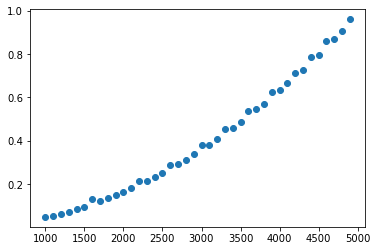

In [61]:
times = exp.experimentByNumberOfRecords(num_records_list, "logTransaction")

drawGraph(num_records_list, times)


Mean execution time for sortedTransactions: 0.0009783329996935208

Mean execution time for sortedTransactions: 0.0013315409996721428

Mean execution time for sortedTransactions: 0.0010487079998711124

Mean execution time for sortedTransactions: 0.0012920829994982341

Mean execution time for sortedTransactions: 0.001605625000593136

Mean execution time for sortedTransactions: 0.001426750000064203

Mean execution time for sortedTransactions: 0.0017550840002513723

Mean execution time for sortedTransactions: 0.002463417000399204

Mean execution time for sortedTransactions: 0.002959333000035258

Mean execution time for sortedTransactions: 0.003224541999770736


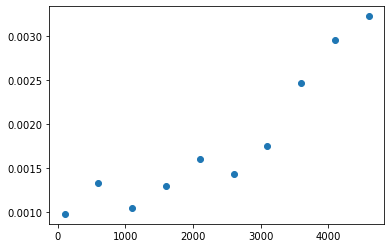

In [21]:
times = exp.experimentByNumberOfRecords(num_records_list, "sortedTransactions", stock_name)

drawGraph(num_records_list, times)

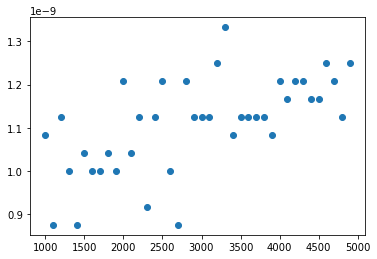

In [62]:
times = exp.experimentByNumberOfRecords(num_records_list, "minTransactions", stock_name)
drawGraph(num_records_list, times)

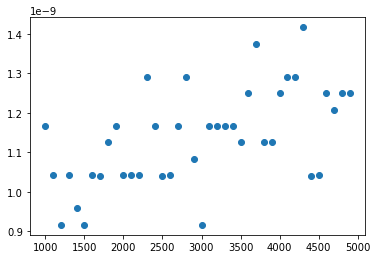

In [63]:
times = exp.experimentByNumberOfRecords(num_records_list, "maxTransactions", stock_name)
drawGraph(num_records_list, times)

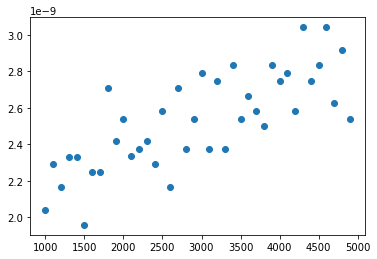

In [64]:
times = exp.experimentByNumberOfRecords(num_records_list, "floorTransactions", stock_name, data_generator.getTradeValue())
drawGraph(num_records_list, times)

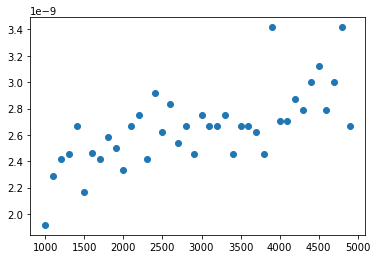

In [65]:
times = exp.experimentByNumberOfRecords(num_records_list, "ceilingTransactions", stock_name, data_generator.getTradeValue())
drawGraph(num_records_list, times)